In [1]:
import glob
from fastai.data.all import *
from fastai.vision.all import *

In [2]:
def label_func(fname):    
    return str(fname).split("\\")[1]

In [3]:
dblock = DataBlock(blocks     = (ImageBlock, CategoryBlock),
                   get_items  = get_image_files,
                   splitter   = RandomSplitter(),
                   get_y      = label_func)

In [4]:
dls = dblock.dataloaders("images")

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


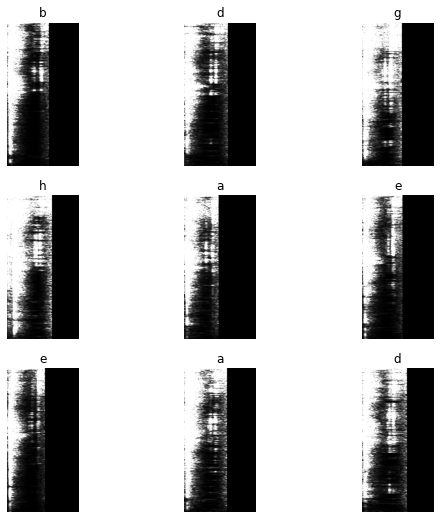

In [5]:
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.009120108559727669)

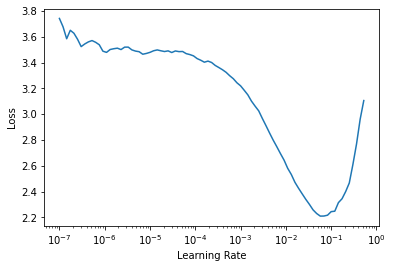

In [7]:
learn.lr_find()

In [11]:
learn.fine_tune(20, 3e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.037490,0.563618,0.146341,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.030048,3.408288,0.439024,00:06
1,0.042961,4.142895,0.422764,00:06
2,0.099472,3.474998,0.373984,00:06
3,0.133964,8.197850,0.626016,00:06
4,0.183577,40.097950,0.837398,00:06
5,0.246935,7.232882,0.487805,00:06
6,0.273407,4.677848,0.406504,00:06
7,0.281870,15.845884,0.707317,00:06
8,0.269703,15.546582,0.707317,00:06
9,0.244691,4.430663,0.504065,00:07


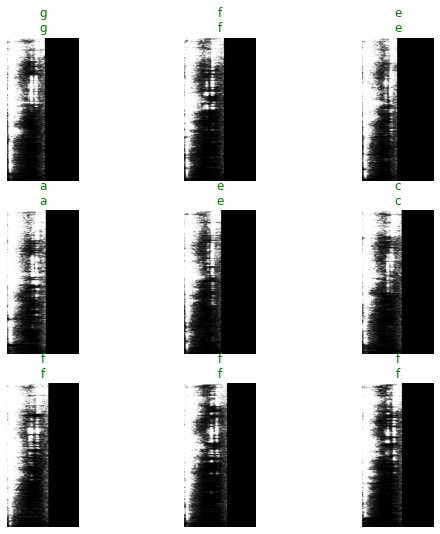

In [15]:
learn.show_results()

In [16]:
learn.export()